# DS-4

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sans

lidl_vasarlok = pd.read_csv("172-monor.csv")
lidl_kmeans = lidl_vasarlok[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
lidl_vasarlok.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## adatmosás

In [24]:
lidl_vasarlok.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot: >

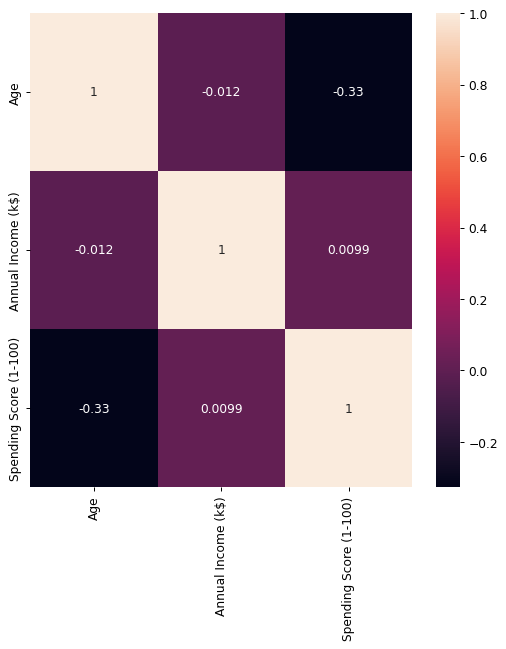

In [25]:
plt.figure(figsize=(7, 7), dpi=88)
df = pd.DataFrame(lidl_kmeans, columns=lidl_kmeans.columns)
lidl_CMatrix = df.corr()
sans.heatmap(lidl_CMatrix, annot=True)


## KMeans KLustering

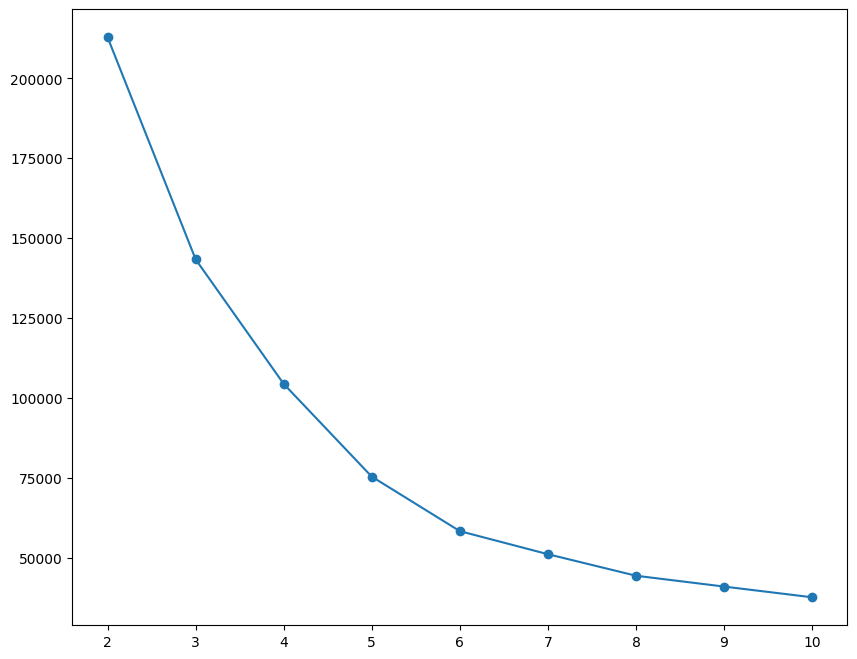

In [26]:
from sklearn.cluster import KMeans
lidl_errors = []
lidl_prime = range(2, 11)
for num in lidl_prime:
    km = KMeans(n_clusters= num, random_state=0)
    km = km.fit(lidl_kmeans)
    lidl_errors.append(km.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(lidl_prime, lidl_errors, marker='o')

In [27]:
km = KMeans(n_clusters=5,random_state=0).fit(lidl_kmeans)
labels = km.labels_
lidl_kmeans['labels'] = labels
lidl_vasarlok['Kmean_labels'] = labels

C:\Users\Petint\AppData\Local\Temp\ipykernel_17364\1270445500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lidl_kmeans['labels'] = labels


<AxesSubplot: xlabel='Kmean_labels', ylabel='count'>

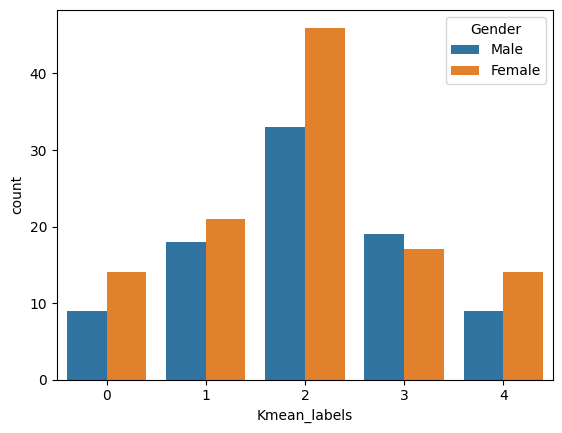

In [28]:
sans.countplot(data=lidl_vasarlok, x='Kmean_labels', hue='Gender')

In [31]:
from plotly import express as px
fig = px.scatter_3d(lidl_kmeans, x='Age',y='Annual Income (k$)', z='Spending Score (1-100)', color=lidl_kmeans['labels'])
fig.show()
